# Bank customer Churn project 

## Import & join the data


In [133]:
import pandas as pd 

churn_cust_info = pd.read_excel('Bank_Churn_Messy.xlsx')

churn_cust_info.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [134]:
churn_acct_info = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name=1)

churn_acct_info.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [135]:
churn_df = churn_cust_info.merge(churn_acct_info, how='left', on='CustomerId')

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [136]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [137]:
churn_df = churn_df.drop('Tenure_y', axis=1).rename({'Tenure_x': 'Tenure'}, axis=1).drop_duplicates()

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [138]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  object 
 8   Balance          10000 non-null  object 
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1.1+ MB


## Data Cleaning 

In [139]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [140]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].str.replace('€', '').astype('float')

In [141]:
churn_df['Balance'] = churn_df['Balance'].str.replace('€', '').astype('float')

In [142]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9997 non-null   float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [143]:
churn_df[churn_df['Surname'].isna()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [144]:
churn_df = churn_df.fillna(value={'Surname':'MISSING', 'Age':churn_df['Age'].median()})

In [145]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [146]:
churn_df.iloc[[28, 121, 9389]]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
29,15728693,MISSING,574,Germany,Female,37.0,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,MISSING,674,Spain,Male,37.0,6,-999999.0,120193.42,1,No,No,0
9390,15756954,MISSING,538,France,Female,37.0,2,-999999.0,0.00,1,Yes,Yes,0


In [147]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.195289,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60583.863580,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50910.677500,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100191.725000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [148]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].replace(-999999, churn_df['EstimatedSalary'].median()) 

In [149]:
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [150]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [151]:
churn_df['Geography'].value_counts()

Geography
Germany    2509
Spain      2477
France     1741
French     1655
FRA        1618
Name: count, dtype: int64

In [152]:
import numpy as np

churn_df['Geography'] = np.where(churn_df['Geography'].isin(['FRA', 'French', 'France']), 'France', churn_df['Geography'])

churn_df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

## EDA

In [153]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


<Axes: xlabel='Exited'>

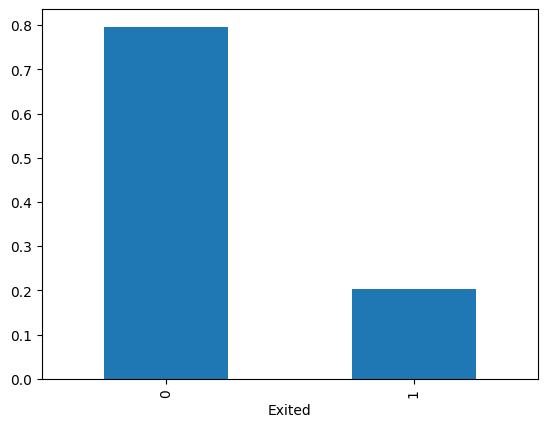

In [154]:
churn_df['Exited'].value_counts(normalize=True).plot.bar()

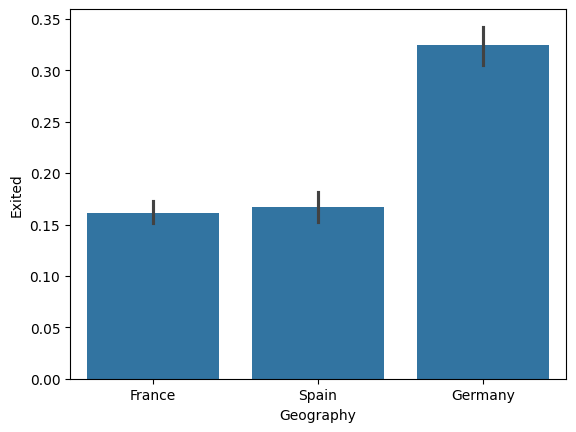

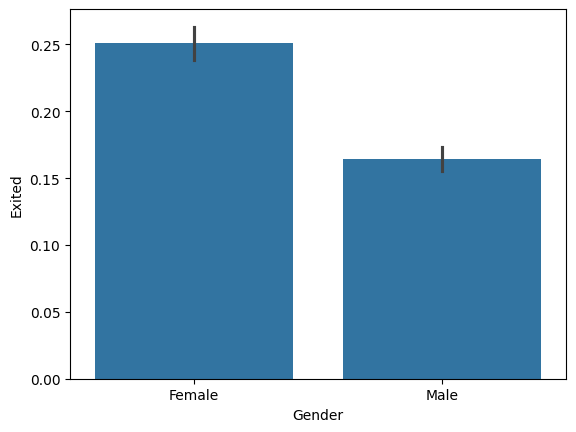

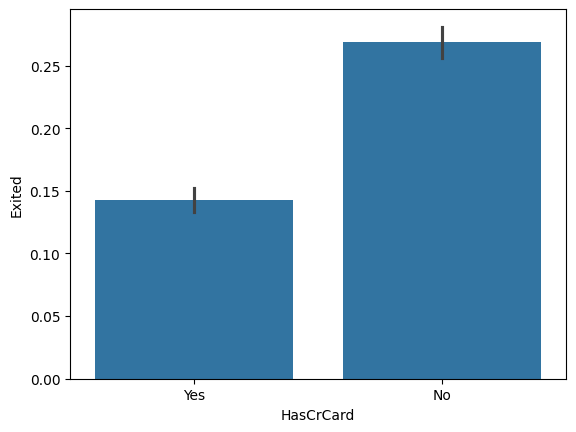

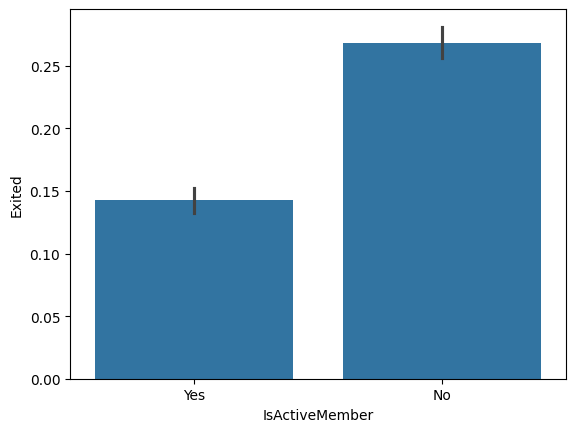

In [155]:
import seaborn as sns 
import matplotlib.pyplot as plt

for col in churn_df.drop('Surname', axis=1).select_dtypes('object'):
    sns.barplot(data=churn_df, x=col, y='Exited')
    
    plt.show()

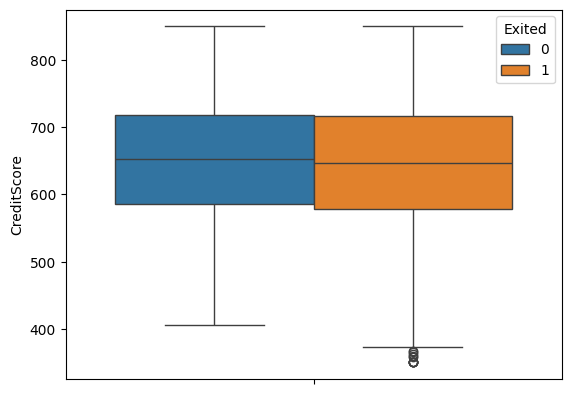

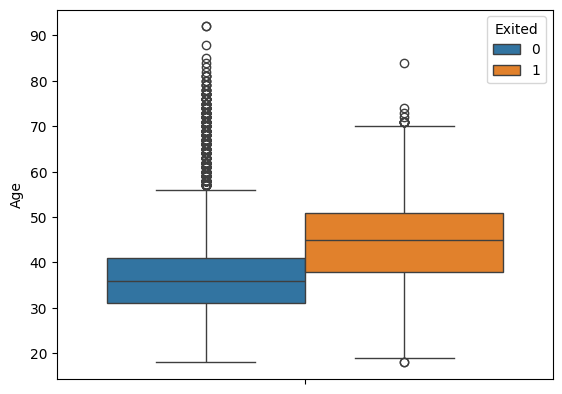

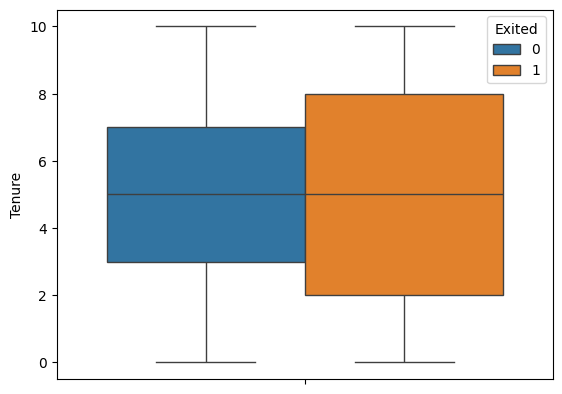

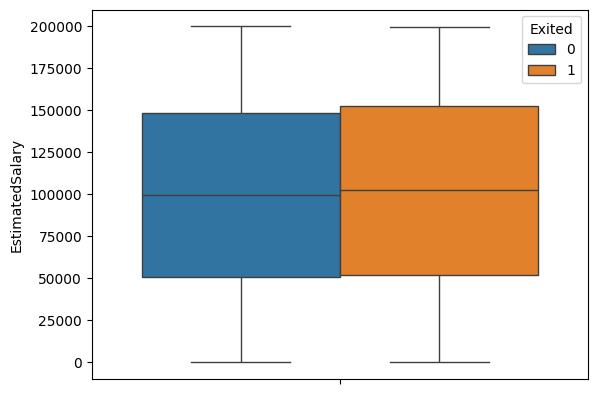

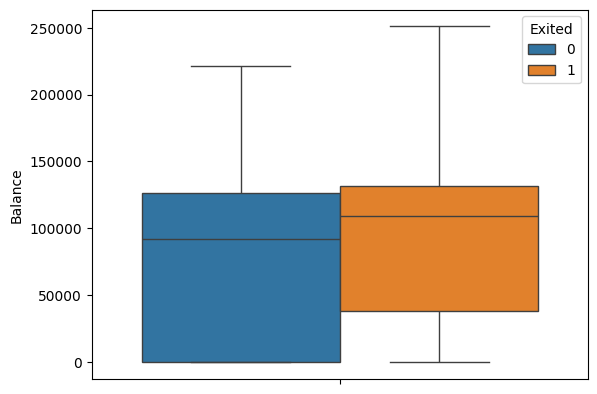

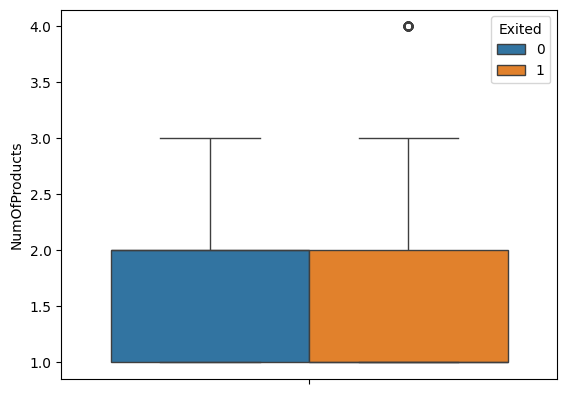

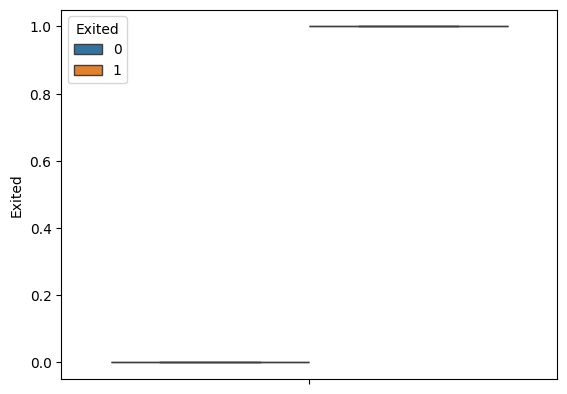

In [156]:


for col in churn_df.drop('CustomerId', axis=1).select_dtypes('number'):
    sns.boxplot(data=churn_df, y=col, hue='Exited')
    plt.show()

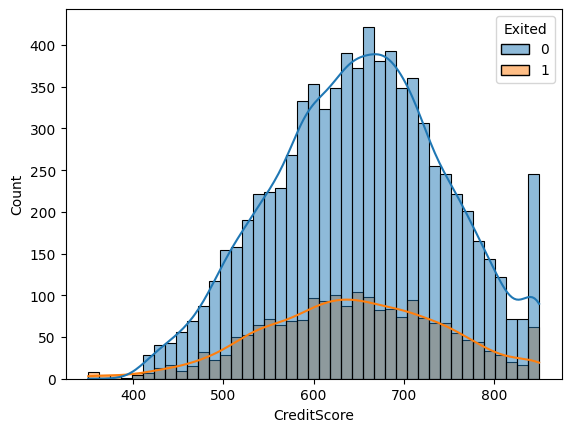

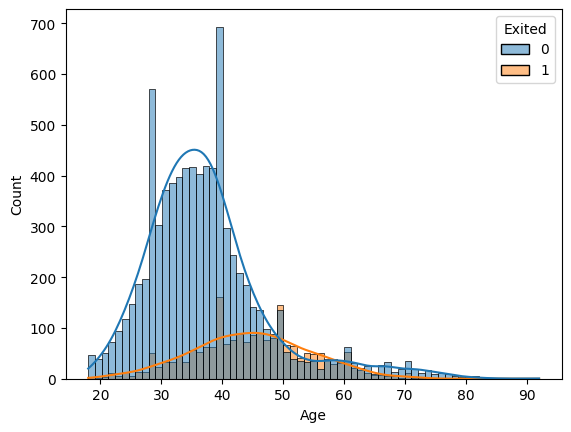

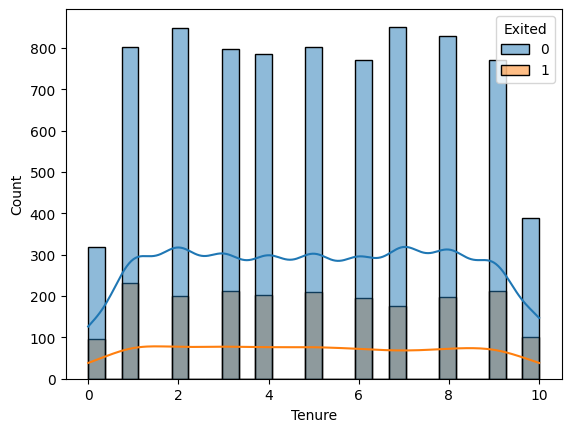

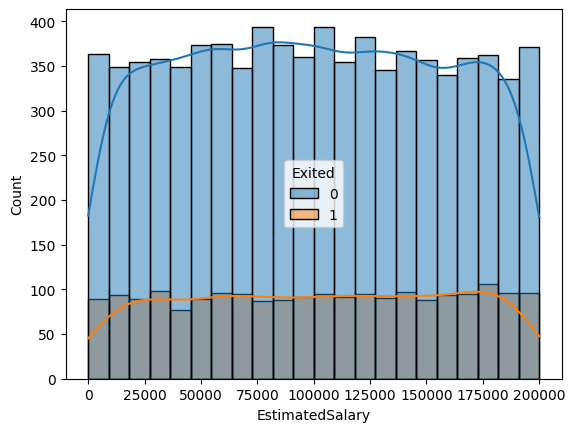

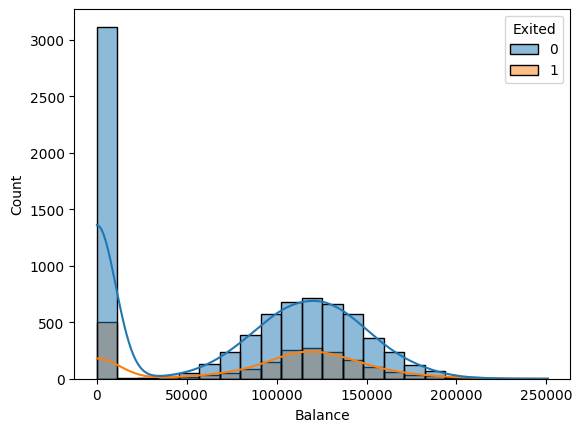

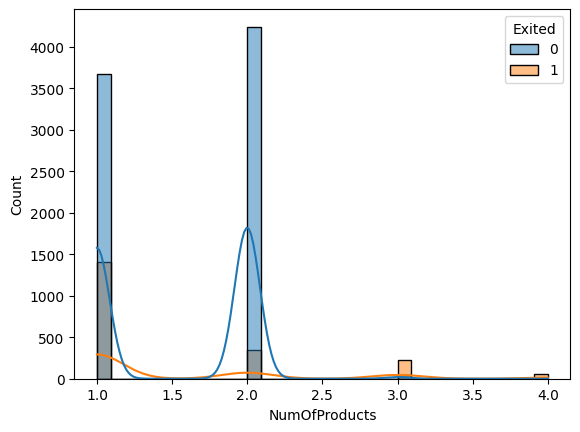

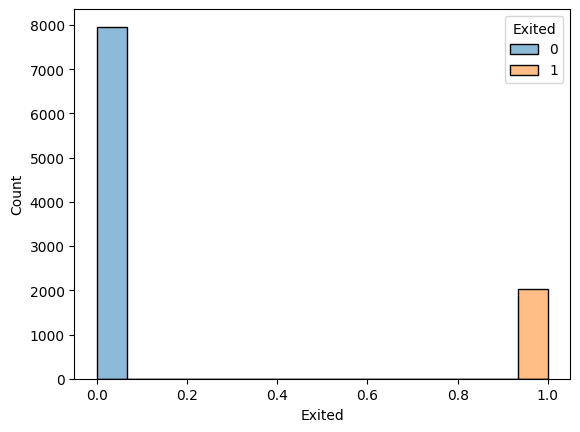

In [157]:

for col in churn_df.drop('CustomerId', axis=1).select_dtypes('number'):
    sns.histplot(data=churn_df, x=col, hue='Exited', kde=True)
    plt.show()

## Data Prep & Feature Engineering 

In [158]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [159]:
modelling_df = churn_df.drop(['CustomerId', 'Surname'], axis=1)

modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [160]:
modelling_df = pd.get_dummies(modelling_df, drop_first=True)

In [161]:
modelling_df['Balance_v_sal'] = modelling_df['Balance'] / modelling_df['EstimatedSalary']

modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


<Axes: ylabel='Balance_v_sal'>

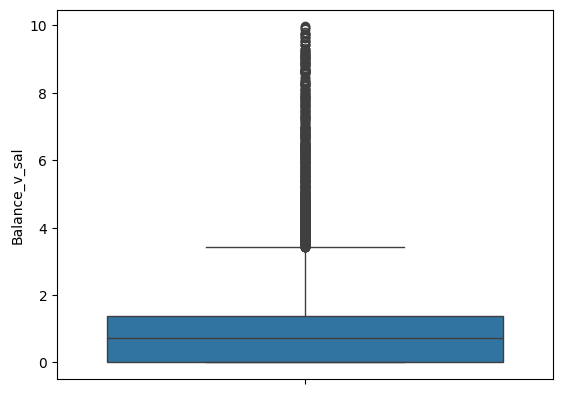

In [162]:
sns.boxplot(data=modelling_df.query('Balance_v_sal < 10'), y='Balance_v_sal')

In [163]:
modelling_df.describe()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Balance_v_sal
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921500,5.012800,100092.252506,76485.889288,1.530200,0.203700,3.878703
std,96.653299,10.487552,2.892174,57510.146401,62397.405202,0.581654,0.402769,108.337260
min,350.000000,18.000000,0.000000,11.580000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,51002.110000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,100196.062500,97198.540000,1.000000,0.000000,0.747002
75%,718.000000,44.000000,7.000000,149388.247500,127644.240000,2.000000,0.000000,1.514022
max,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000,10614.655440


<Axes: ylabel='Balance_v_sal'>

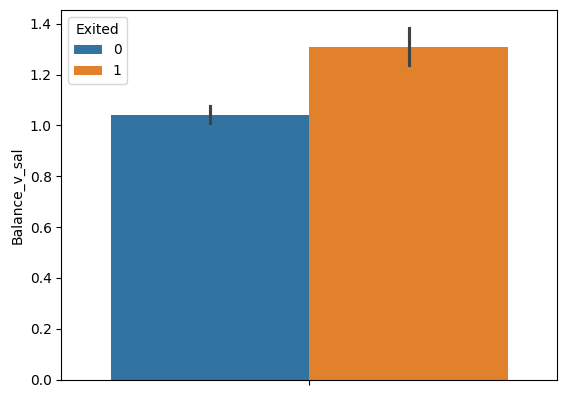

In [164]:
sns.barplot(data=modelling_df.query('Balance_v_sal < 10'), y='Balance_v_sal', hue='Exited')

## -----------------------------------------------------------------------------------------------------

In [165]:
churn_modelling_df = modelling_df

churn_modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_sal
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055


In [166]:
churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df['Balance'] / churn_modelling_df['EstimatedSalary'],
    income_v_product = churn_modelling_df['EstimatedSalary'] / churn_modelling_df['NumOfProducts']
    )

churn_modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_sal,balance_to_income,income_v_product
0,619,42.0,2,101348.88,0.00,1,1,False,False,False,True,True,0.000000,0.000000,101348.880
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True,0.744677,0.744677,112542.580
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False,1.401375,1.401375,37977.190
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False,0.000000,0.000000,46913.315
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True,1.587055,1.587055,79084.100


In [167]:
churn_modelling_df['Geography_Germany'] = churn_modelling_df['Geography_Germany'].astype(int)
churn_modelling_df['Geography_Spain'] = churn_modelling_df['Geography_Spain'].astype(int)
#churn_modelling_df['Geography_France'] = churn_modelling_df['Geography_France'].astype(int)
churn_modelling_df['Gender_Male'] = churn_modelling_df['Gender_Male'].astype(int)
churn_modelling_df['HasCrCard_Yes'] = churn_modelling_df['HasCrCard_Yes'].astype(int)
churn_modelling_df['IsActiveMember_Yes'] = churn_modelling_df['IsActiveMember_Yes'].astype(int)


In [168]:
churn_modelling_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 10000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  float64
 2   Tenure              10000 non-null  int64  
 3   EstimatedSalary     10000 non-null  float64
 4   Balance             10000 non-null  float64
 5   NumOfProducts       10000 non-null  int64  
 6   Exited              10000 non-null  int64  
 7   Geography_Germany   10000 non-null  int64  
 8   Geography_Spain     10000 non-null  int64  
 9   Gender_Male         10000 non-null  int64  
 10  HasCrCard_Yes       10000 non-null  int64  
 11  IsActiveMember_Yes  10000 non-null  int64  
 12  Balance_v_sal       10000 non-null  float64
 13  balance_to_income   10000 non-null  float64
 14  income_v_product    10000 non-null  float64
dtypes: float64(6), int64(9)
memory usage: 1.2 MB


<Axes: xlabel='Exited', ylabel='balance_to_income'>

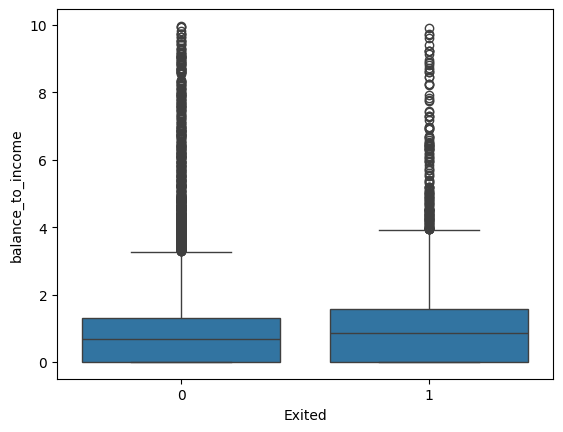

In [169]:
sns.boxplot(churn_modelling_df.query('balance_to_income < 10'), x='Exited', y='balance_to_income')

In [175]:
round(churn_modelling_df['balance_to_income'].mean(), 2)

np.float64(3.88)

<Axes: xlabel='Exited', ylabel='income_v_product'>

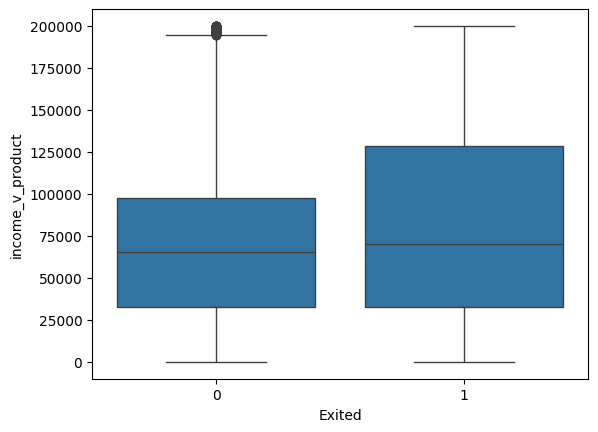

In [171]:
sns.boxplot(churn_modelling_df, x='Exited', y='income_v_product')

In [172]:
churn_modelling_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes,Balance_v_sal,balance_to_income,income_v_product
0,619,42.0,2,101348.88,0.00,1,1,0,0,0,1,1,0.000000,0.000000,101348.880
2,608,41.0,1,112542.58,83807.86,1,0,0,1,0,1,1,0.744677,0.744677,112542.580
3,502,42.0,8,113931.57,159660.80,3,1,0,0,0,0,0,1.401375,1.401375,37977.190
4,699,39.0,1,93826.63,0.00,2,0,0,0,0,0,0,0.000000,0.000000,46913.315
5,850,43.0,2,79084.10,125510.82,1,0,0,1,0,1,1,1.587055,1.587055,79084.100


In [75]:
from sklearn.model_selection import train_test_split

X = churn_modelling_df.drop('Exited', axis=1)
y = churn_modelling_df['Exited']

X_train, X_test, y_trian, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8277 to 7817
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         8000 non-null   int64  
 1   Age                 8000 non-null   float64
 2   Tenure              8000 non-null   int64  
 3   EstimatedSalary     8000 non-null   float64
 4   Balance             8000 non-null   float64
 5   NumOfProducts       8000 non-null   int64  
 6   Geography_Germany   8000 non-null   int64  
 7   Geography_Spain     8000 non-null   int64  
 8   Gender_Male         8000 non-null   int64  
 9   HasCrCard_Yes       8000 non-null   int64  
 10  IsActiveMember_Yes  8000 non-null   int64  
 11  Balance_v_sal       8000 non-null   float64
 12  balance_to_income   8000 non-null   float64
 13  income_v_product    8000 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 937.5 KB


In [76]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 8375 to 8467
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         2000 non-null   int64  
 1   Age                 2000 non-null   float64
 2   Tenure              2000 non-null   int64  
 3   EstimatedSalary     2000 non-null   float64
 4   Balance             2000 non-null   float64
 5   NumOfProducts       2000 non-null   int64  
 6   Geography_Germany   2000 non-null   int64  
 7   Geography_Spain     2000 non-null   int64  
 8   Gender_Male         2000 non-null   int64  
 9   HasCrCard_Yes       2000 non-null   int64  
 10  IsActiveMember_Yes  2000 non-null   int64  
 11  Balance_v_sal       2000 non-null   float64
 12  balance_to_income   2000 non-null   float64
 13  income_v_product    2000 non-null   float64
dtypes: float64(6), int64(8)
memory usage: 234.4 KB


## Logistic Regression:

In [87]:
X_train2 = X_train.drop(['Balance', 'EstimatedSalary', 'income_v_product'], axis=1)

In [92]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cholesky')

lr = logreg.fit(X_train, y_trian)

print(f'Train Accuracy : {lr.score(X_train, y_trian)}')

Train Accuracy : 0.81725


In [93]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_trian, lr.predict(X_train))

array([[6116,  256],
       [1206,  422]])

In [94]:
recall_score(y_trian, lr.predict(X_train))

0.2592137592137592

In [86]:
list(zip(X_train, lr.coef_[0]))

[('CreditScore', np.float64(-0.0009074621899585122)),
 ('Age', np.float64(0.07353532370075046)),
 ('Tenure', np.float64(-0.016365618420269082)),
 ('EstimatedSalary', np.float64(-1.713505439556785e-05)),
 ('Balance', np.float64(2.179540588482662e-06)),
 ('NumOfProducts', np.float64(0.7985813702739544)),
 ('Geography_Germany', np.float64(0.793212663956815)),
 ('Geography_Spain', np.float64(0.03624746834170391)),
 ('Gender_Male', np.float64(-0.49948087784837486)),
 ('HasCrCard_Yes', np.float64(-0.5395722906770147)),
 ('IsActiveMember_Yes', np.float64(-0.5395722906770147)),
 ('Balance_v_sal', np.float64(0.0002896608204334492)),
 ('balance_to_income', np.float64(0.00028966082042033097)),
 ('income_v_product', np.float64(2.219329127956619e-05))]

In [95]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1535,   56],
       [ 321,   88]])

In [96]:
print(f'Test Accuracy : {lr.score(X_test, y_test)}')

Test Accuracy : 0.8115


In [97]:
precision_score(y_test, lr.predict(X_test))

0.6111111111111112

In [98]:
recall_score(y_test, lr.predict(X_test))

0.21515892420537897

In [99]:
f1_score(y_test, lr.predict(X_test))

0.3182640144665461

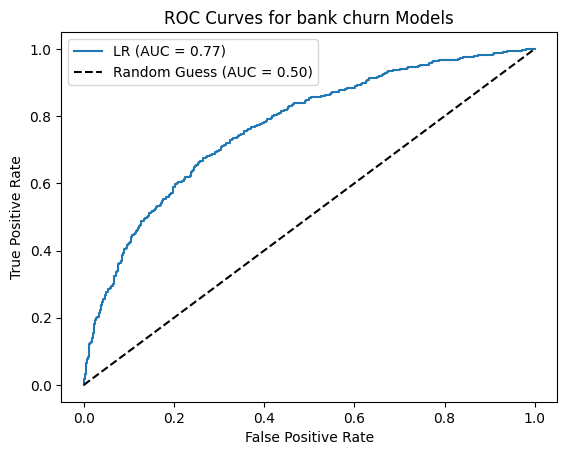

In [102]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

# plot the ROC curve 
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label= 'Random Guess (AUC = 0.50)')

# modify formating 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for bank churn Models')
plt.legend()
plt.show()

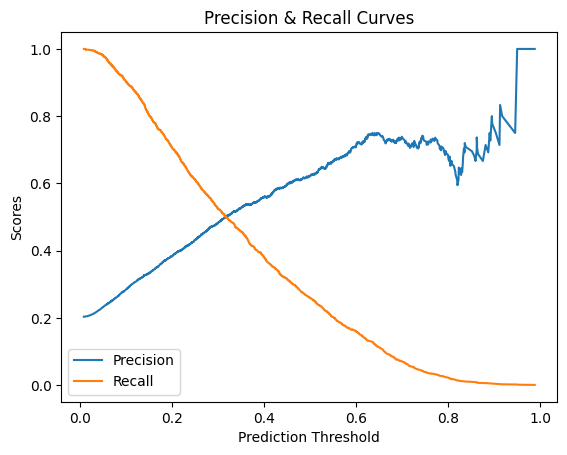

In [107]:
from sklearn.metrics import precision_recall_curve

p_curve, r_curve, t_curve = precision_recall_curve(y_trian, lr.predict_proba(X_train)[:,1])
                                                     

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
         
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')

plt.legend()
plt.title('Precision & Recall Curves')
plt.show( )


In [108]:
import numpy as np

np.where(p_curve > .5)

(array([6371, 6379, 6380, ..., 7998, 7999, 8000], shape=(1623,)),)

In [109]:
t_curve[6377]

np.float64(0.31738460061165624)

In [110]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > .312)

array([[1394,  197],
       [ 215,  194]])

In [113]:
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > .34)

0.4180929095354523

In [114]:
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > .34)

0.5197568389057751

# Random Forest 

In [116]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(X_train, y_trian)


print(f'Train Accuracy : {rf.score(X_train, y_trian)}')
print(f'Test Accuracy : {rf.score(X_test, y_test)}')

Train Accuracy : 1.0
Test Accuracy : 0.854


In [130]:
from sklearn. model_selection import RandomizedSearchCV 
import numpy as np


rf = RandomForestClassifier(random_state=2023, n_jobs=-1)
                            
params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features':[None, "sqrt"],
    'bootstrap':[True],
    'max_samples':[None, .3, .5, .9],
    'max_depth':np.arange (start=1,stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
    }



grid = RandomizedSearchCV(
rf,
params,
n_iter=100,
scoring="accuracy"
)

grid.fit(X_train, y_trian)


grid.best_params_

{'n_estimators': np.int64(600),
 'min_samples_leaf': 10,
 'max_samples': 0.9,
 'max_features': None,
 'max_depth': np.int64(10),
 'bootstrap': True}

In [131]:
from sklearn. model_selection import GridSearchCV


params = {
    'n_estimators': np.arange(start=800, stop=951, step=10),
    'max_samples':[.4, .5, .6],
    'max_depth':[8, 10, 12],
    'min_samples_leaf': [5, 10, 15],
    }



grid = RandomizedSearchCV(
rf,
params,
n_iter=100,
scoring="accuracy"
)

grid.fit(X_train, y_trian)


grid.best_params_

KeyboardInterrupt: 

In [ ]:
rf =  RandomForestClassifier(**{'n_estimators': 890, 
'min_samples_leaf': 12, 
'max_samples': 0.5, 
'max_depth': 12,
'bootstrap':True})

rf = rf.fit(X_train, y_trian)

print(f'Trian Accuracy: {rf.score(X_train, y_trian)}')
print(f'Test Accuracy : {rf.score(X_test, y_test)}')

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)


In [ ]:
importance = pd.DataFrame(
    {'feature: X_trian.columns,'
    'importance': rf.feature_importances_}
).sort_values('importance', ascending =False).iloc[:20]

sns.barplot(importance, x='importance', y='feature')